## SICLIFE ANALYSIS

In [123]:
import pandas as pd

# Load datasets
# poli = pd.read_csv('./data/data_poli.csv')
# mmc = pd.read_csv('./data/mmc1.csv')
# sic = pd.read_csv('./data/SICLIFE DATA.csv')
# poli.head()
# mmc.head()
df = pd.read_csv('./data/SICLIFE DATA.csv')
df.head()

,POLICY,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION,EXPIRY,MONTHLY,SUM,PAID PREMIUM,PREMIUM,TOTAL PREMIUM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,DATE,DATE,PLANNED,ASSURED,2024,COUNT,TO DATE
1,1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50"
2,1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80"
3,2,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00"
4,3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00"


In [124]:
# Rename the columns to drop the first row
df = df.rename(columns={
    'INCEPTION': 'INCEPTION DATE',
    'EXPIRY': 'EXPIRY DATE',
    'MONTHLY': 'MONTHLY PAYMENT',
    'PREMIUM': 'PREMIUM_COUNT',
    'SUM': 'SUM ASSURED',
    'RPREMIUM': 'PREMIUM 2024',
    })


In [125]:
# Categorize to type of policy
policy_type_map = {
    'FAMILY SECURITY PLAN': 'TERM INSURANCE',
    'FLEXI CHILD EDUCATION': 'ENDOWMENT INSURANCE',
    'EDUCATION': 'WHOLE LIFE INSURANCE'
    # Add more mappings as needed
}

# Create a new column for policy type
df['POLICY_TYPE'] = df['PLAN'].map(policy_type_map)
df['PROD_TYPE'] = df['PLAN'].str.lower()  # Resolve inconsistencies


In [126]:
# Drop the first row
df = df.drop(df.index[0])

# Drop the first column
df = df.drop(df.columns[0], axis=1)
# df.head()

In [128]:
# Convert data types
df['INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'])
df['EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'])
df['MONTHLY PAYMENT'] = df['MONTHLY PAYMENT'].astype(float)
df['SUM ASSURED'] = df['SUM ASSURED'].astype(str).str.replace(',', '').astype(float)
df['PAID PREMIUM'] = df['PAID PREMIUM'].astype(str).str.replace(',', '').astype(float)
df['PREMIUM_COUNT'] = df['PREMIUM_COUNT'].fillna(0).astype(int)
df['TOTAL PREMIUM'] = df['TOTAL PREMIUM'].astype(str).str.replace(',', '').astype(float)
df


,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_COUNT,TOTAL PREMIUM,POLICY_TYPE,PROD_TYPE
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,30.0,500.0,87.3,3,1891.5,TERM INSURANCE,family security plan
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,60.0,2000.0,174.6,3,1687.8,TERM INSURANCE,family security plan
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,150.0,2000.0,436.5,3,3783.0,TERM INSURANCE,family security plan
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,50.0,1500.0,145.5,3,1164.0,TERM INSURANCE,family security plan
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,100.0,2000.0,0.0,0,100.0,TERM INSURANCE,family security plan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN
617,NaN,NaN,"1,143,560.00",50,NaN,"186,648.45",NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN,NaN,NaN


In [129]:
# Check for missing values
print("Missing values in each column:")

print(df.isnull().sum())

Missing values in each column:
POLICY NO.          5
ASSURED             5
GENDER              4
OCCUP.              5
BRANCH              5
INST.               4
PLAN                5
PROPOSALS           5
INCEPTION DATE      5
EXPIRY DATE         5
MONTHLY PAYMENT     5
SUM ASSURED         5
PAID PREMIUM        5
PREMIUM_COUNT       0
TOTAL PREMIUM       5
POLICY_TYPE        10
PROD_TYPE           5
dtype: int64


In [131]:

# Data Preprocessing
df = df.dropna()
# Transform variables
df['INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'], errors='coerce')
df['EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'], errors='coerce')
df['AGE'] = (df['EXPIRY DATE'] - df['INCEPTION DATE']).dt.days / 365.25  # Create age column
print("Missing values in each column:")
df.isnull().sum()


Missing values in each column:


POLICY NO.         0
ASSURED            0
GENDER             0
OCCUP.             0
BRANCH             0
INST.              0
PLAN               0
PROPOSALS          0
INCEPTION DATE     0
EXPIRY DATE        0
MONTHLY PAYMENT    0
SUM ASSURED        0
PAID PREMIUM       0
PREMIUM_COUNT      0
TOTAL PREMIUM      0
POLICY_TYPE        0
PROD_TYPE          0
AGE                0
dtype: int64

In [132]:
# Identify duplicate records
duplicates = df.duplicated()
print(f"Number of duplicate records: {duplicates.sum()}")
if duplicates.any():
    print("Duplicate records:")
    print(data[duplicates])


Number of duplicate records: 0


In [133]:
# Policy Duration
df['POLICY_DURATION'] = (df['EXPIRY DATE'] - df['INCEPTION DATE']).dt.days / 365.25


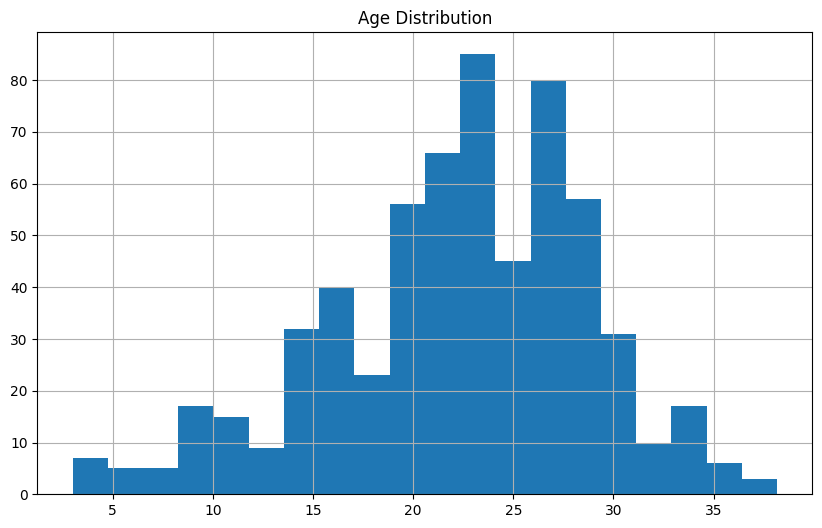

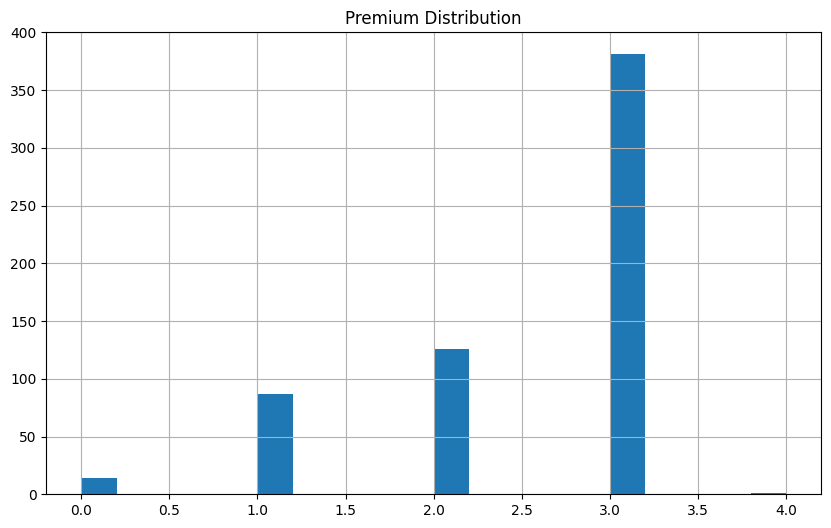

In [134]:
# Descriptive Statistics
age_stats = df['AGE'].describe()
premium_stats = df['PREMIUM_COUNT'].describe()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['AGE'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
df['PREMIUM_COUNT'].hist(bins=20)
plt.title('Premium Distribution')
plt.show()

In [135]:
# Create policy duration category
df['POLICY_DURATION_CATEGORY'] = pd.cut(df['POLICY_DURATION'], bins=[0, 5, 10, 20, 50], labels=['<5 years', '5-10 years', '10-20 years', '>20 years'])
# Create age group categories
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '30-45', '45-60', '>60']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
df

,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,...,SUM ASSURED,PAID PREMIUM,PREMIUM_COUNT,TOTAL PREMIUM,POLICY_TYPE,PROD_TYPE,AGE,POLICY_DURATION,POLICY_DURATION_CATEGORY,AGE_GROUP
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,...,500.0,87.30,3,1891.50,TERM INSURANCE,family security plan,9.169062,9.169062,5-10 years,<18
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,...,2000.0,174.60,3,1687.80,TERM INSURANCE,family security plan,26.417522,26.417522,>20 years,18-30
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,...,2000.0,436.50,3,3783.00,TERM INSURANCE,family security plan,31.000684,31.000684,>20 years,30-45
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,...,1500.0,145.50,3,1164.00,TERM INSURANCE,family security plan,16.999316,16.999316,10-20 years,<18
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,...,2000.0,0.00,0,100.00,TERM INSURANCE,family security plan,28.999316,28.999316,>20 years,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,UKS2024T00629,ESTHER,FEMALE,SEAMTRESS,ACCRA NO BRANCH,CASH,FLEXI CHILD EDUCATION,4-Mar-24,2024-03-01,2041-05-01,...,2000.0,1300.00,2,1300.00,ENDOWMENT INSURANCE,flexi child education,17.166324,17.166324,10-20 years,<18
612,UKS2024T00644,JOHN,MALE,EDUCATIONIST,ACCRA NO BRANCH,CASH,FLEXI CHILD EDUCATION,4-Mar-24,2024-03-01,2049-09-01,...,2000.0,200.00,1,200.00,ENDOWMENT INSURANCE,flexi child education,25.503080,25.503080,>20 years,18-30
613,UKS2024T00630,FRANCIS,MALE,PASTOR,ACCRA NO BRANCH,CASH,FAMILY SECURITY PLAN,4-Mar-24,2024-03-01,2038-08-01,...,1500.0,100.00,1,100.00,TERM INSURANCE,family security plan,14.417522,14.417522,10-20 years,<18
614,UKS2024T00690,SILAS,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,13-Mar-24,2024-03-01,2050-02-01,...,0.0,100.88,1,100.88,TERM INSURANCE,family security plan,25.921971,25.921971,>20 years,18-30


In [104]:
# pip install statsmodels
df['GENDER'] = df['GENDER'].map({'MALE': 1, 'FEMALE': 0})

C:\Users\Reaper\AppData\Local\Temp\ipykernel_37596\2143517940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER'] = df['GENDER'].map({'MALE': 1, 'FEMALE': 0})


In [105]:
# # Identify outliers
# numerical_cols = df.select_dtypes(include=['number']).columns
# for col in numerical_cols:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     if not outliers.empty:
#         print(f"Outliers in column '{col}':")
#         print(outliers)

In [106]:
# Inferential Statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PREMIUM_COUNT ~ AGE + GENDER + C(PROD_TYPE)', data=df).fit()
print(model.summary())

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['AGE', 'GENDER']].copy()
X = pd.concat([X, pd.get_dummies(df['PROD_TYPE'])], axis=1)
y = df['PREMIUM_COUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                            OLS Regression Results                            
Dep. Variable:          PREMIUM_COUNT   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.191
Date:                Fri, 07 Jun 2024   Prob (F-statistic):              0.314
Time:                        00:51:16   Log-Likelihood:                -741.31
No. Observations:                 609   AIC:                             1493.
Df Residuals:                     604   BIC:                             1515.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [107]:
# Random Forest Model
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print(f"Decision Tree R^2: {tree_model.score(X_test, y_test):.3f}")

Decision Tree R^2: -0.383


In [108]:
#Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
print(f"Gradient Boosting R^2: {gb_model.score(X_test, y_test):.3f}")

Gradient Boosting R^2: -0.118


In [109]:
# Support Vector Machine
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
print(f"Support Vector Regression R^2: {svr_model.score(X_test, y_test):.3f}")

Support Vector Regression R^2: -0.147


In [110]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print(f"Decision Tree R^2: {tree_model.score(X_test, y_test):.3f}")

Decision Tree R^2: -0.383
